<a href="https://colab.research.google.com/github/paulajob212/Mercado_casa/blob/main/Paula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
#quiero solucionar que sale float en la tasa de desercion pasalo a numero entero
df_cursos_especiales['TASA_DESERCION'] = df_cursos_especiales['TASA_DESERCION'].astype(int)
print(df_cursos_especiales.head())
print(df_cursos_especiales.info())

    CODIGO_REGIONAL  NOMBRE_REGIONAL  CODIGO_CENTRO  NOMBRE_CENTRO  \
7                13                4           9304             24   
8                11               14           9405             70   
10                8                3           9302             24   
17               13                4           9218             99   
18               11               14           9405             70   

    IDENTIFICADOR_UNICO_FICHA FECHA_INICIO_FICHA FECHA_TERMINACION_FICHA  \
7                    12909270         2024-02-08              2024-03-06   
8                    12914465         2024-02-19              2024-02-27   
10                   12918237         2024-02-06              2024-02-27   
17                   12910192         2024-02-09              2024-03-13   
18                   12910682         2024-02-09              2024-03-07   

   CODIGO_PROGRAMA  VERSION_PROGRAMA           NOMBRE_PROGRAMA_FORMACION  \
7       "13410029"                 2  ADMINIST

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar archivo
df = pd.read_excel('DATA.xlsx') # Changed to pd.read_excel and corrected extension

# Guarda una copia del dataset original antes de comenzar la limpieza.
df_original = df.copy()

# Vista general
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42080 entries, 0 to 42079
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   CODIGO_REGIONAL                42080 non-null  int64 
 1   NOMBRE_REGIONAL                42080 non-null  object
 2   CODIGO_CENTRO                  42080 non-null  int64 
 3   NOMBRE_CENTRO                  42080 non-null  object
 4   IDENTIFICADOR_UNICO_FICHA      42080 non-null  int64 
 5   FECHA_INICIO_FICHA             42080 non-null  object
 6   FECHA_TERMINACION_FICHA        42080 non-null  object
 7   CODIGO_PROGRAMA                42080 non-null  object
 8   VERSION_PROGRAMA               42080 non-null  int64 
 9   NOMBRE_PROGRAMA_FORMACION      42080 non-null  object
 10  NIVEL_FORMACION                42080 non-null  object
 11  MODALIDAD_FORMACION            42080 non-null  object
 12  TOTAL_APRENDICES_MATRICULADOS  42080 non-null  int64 
 13  D

In [4]:
#crearemos una data donde filtremos unicamente las filas donde el nivel de formacion corresponda a cursos especiales
df_cursos_especiales = df[df['NIVEL_FORMACION'] == '"CURSO ESPECIAL"'].copy()
print(df_cursos_especiales.head())
print(df_cursos_especiales.info())


    CODIGO_REGIONAL              NOMBRE_REGIONAL  CODIGO_CENTRO  \
7                13           "REGIONAL BOLIVAR"           9304   
8                11  "REGIONAL DISTRITO CAPITAL"           9405   
10                8         "REGIONAL ATLANTICO"           9302   
17               13           "REGIONAL BOLIVAR"           9218   
18               11  "REGIONAL DISTRITO CAPITAL"           9405   

                              NOMBRE_CENTRO  IDENTIFICADOR_UNICO_FICHA  \
7          "CENTRO DE COMERCIO Y SERVICIOS"                   12909270   
8         "CENTRO DE SERVICIOS FINANCIEROS"                   12914465   
10         "CENTRO DE COMERCIO Y SERVICIOS"                   12918237   
17  "CENTRO PARA LA INDUSTRIA PETROQUIMICA"                   12910192   
18        "CENTRO DE SERVICIOS FINANCIEROS"                   12910682   

   FECHA_INICIO_FICHA FECHA_TERMINACION_FICHA CODIGO_PROGRAMA  \
7        "08/02/2024"            "06/03/2024"      "13410029"   
8        "19/02/2024" 

In [7]:
#vamos a crear una nueva columna de porcentaje de desercion donde se divide DESERTORES_AÑO_ACTUAL/TOTAL_APRENDICES_MATRICULADOS
df_cursos_especiales['TASA_DESERCION'] = (df_cursos_especiales['DESERTORES_AÑO_ACTUAL'] /
                                         df_cursos_especiales['TOTAL_APRENDICES_MATRICULADOS']) * 100

print (df_cursos_especiales.head())

    CODIGO_REGIONAL              NOMBRE_REGIONAL  CODIGO_CENTRO  \
7                13           "REGIONAL BOLIVAR"           9304   
8                11  "REGIONAL DISTRITO CAPITAL"           9405   
10                8         "REGIONAL ATLANTICO"           9302   
17               13           "REGIONAL BOLIVAR"           9218   
18               11  "REGIONAL DISTRITO CAPITAL"           9405   

                              NOMBRE_CENTRO  IDENTIFICADOR_UNICO_FICHA  \
7          "CENTRO DE COMERCIO Y SERVICIOS"                   12909270   
8         "CENTRO DE SERVICIOS FINANCIEROS"                   12914465   
10         "CENTRO DE COMERCIO Y SERVICIOS"                   12918237   
17  "CENTRO PARA LA INDUSTRIA PETROQUIMICA"                   12910192   
18        "CENTRO DE SERVICIOS FINANCIEROS"                   12910682   

   FECHA_INICIO_FICHA FECHA_TERMINACION_FICHA CODIGO_PROGRAMA  \
7        "08/02/2024"            "06/03/2024"      "13410029"   
8        "19/02/2024" 

In [8]:
#quitarle las comillas al nombre cursos especiales
df_cursos_especiales['NIVEL_FORMACION'] = df_cursos_especiales['NIVEL_FORMACION'].str.replace('"', '')
print(df_cursos_especiales.head())

    CODIGO_REGIONAL              NOMBRE_REGIONAL  CODIGO_CENTRO  \
7                13           "REGIONAL BOLIVAR"           9304   
8                11  "REGIONAL DISTRITO CAPITAL"           9405   
10                8         "REGIONAL ATLANTICO"           9302   
17               13           "REGIONAL BOLIVAR"           9218   
18               11  "REGIONAL DISTRITO CAPITAL"           9405   

                              NOMBRE_CENTRO  IDENTIFICADOR_UNICO_FICHA  \
7          "CENTRO DE COMERCIO Y SERVICIOS"                   12909270   
8         "CENTRO DE SERVICIOS FINANCIEROS"                   12914465   
10         "CENTRO DE COMERCIO Y SERVICIOS"                   12918237   
17  "CENTRO PARA LA INDUSTRIA PETROQUIMICA"                   12910192   
18        "CENTRO DE SERVICIOS FINANCIEROS"                   12910682   

   FECHA_INICIO_FICHA FECHA_TERMINACION_FICHA CODIGO_PROGRAMA  \
7        "08/02/2024"            "06/03/2024"      "13410029"   
8        "19/02/2024" 

In [9]:
#quitarle la comilla a "VIRTUAL", "PRESENCIAL"
df_cursos_especiales['MODALIDAD_FORMACION'] = df_cursos_especiales['MODALIDAD_FORMACION'].str.replace('"', '')
print(df_cursos_especiales.head())


    CODIGO_REGIONAL              NOMBRE_REGIONAL  CODIGO_CENTRO  \
7                13           "REGIONAL BOLIVAR"           9304   
8                11  "REGIONAL DISTRITO CAPITAL"           9405   
10                8         "REGIONAL ATLANTICO"           9302   
17               13           "REGIONAL BOLIVAR"           9218   
18               11  "REGIONAL DISTRITO CAPITAL"           9405   

                              NOMBRE_CENTRO  IDENTIFICADOR_UNICO_FICHA  \
7          "CENTRO DE COMERCIO Y SERVICIOS"                   12909270   
8         "CENTRO DE SERVICIOS FINANCIEROS"                   12914465   
10         "CENTRO DE COMERCIO Y SERVICIOS"                   12918237   
17  "CENTRO PARA LA INDUSTRIA PETROQUIMICA"                   12910192   
18        "CENTRO DE SERVICIOS FINANCIEROS"                   12910682   

   FECHA_INICIO_FICHA FECHA_TERMINACION_FICHA CODIGO_PROGRAMA  \
7        "08/02/2024"            "06/03/2024"      "13410029"   
8        "19/02/2024" 

In [ ]:
#creame un dataframe con las siguientes columnas: NOMBRE_REGIONAL, NOMBRE_CENTRO, FECHA_INICIO_FICHA, FECHA_TERMINACION_FICHA, DURACION_CURSO, NOMBRE_PROGRAMA_FORMACION, NIVEL_FORMACION, MODALIDAD_FORMACION
df_modelo = df_cursos_especiales[['NOMBRE_REGIONAL', 'NOMBRE_CENTRO', 'FECHA_INICIO_FICHA', 'FECHA_TERMINACION_FICHA', 'NOMBRE_PROGRAMA_FORMACION', 'NIVEL_FORMACION', 'MODALIDAD_FORMACION']]
print(df_modelo.head())


    NOMBRE_REGIONAL  NOMBRE_CENTRO FECHA_INICIO_FICHA FECHA_TERMINACION_FICHA  \
7                 4             25         2024-02-08              2024-03-06   
8                14             70         2024-02-19              2024-02-27   
10                3             25         2024-02-06              2024-02-27   
17                4             99         2024-02-09              2024-03-13   
18               14             70         2024-02-09              2024-03-07   

             NOMBRE_PROGRAMA_FORMACION NIVEL_FORMACION MODALIDAD_FORMACION  
7   ADMINISTRACION DE RECURSOS HUMANOS  CURSO ESPECIAL             VIRTUAL  
8                   LIDERAZGO EFECTIVO  CURSO ESPECIAL          PRESENCIAL  
10                   MERCADEO Y VENTAS  CURSO ESPECIAL          PRESENCIAL  
17         ENGLISH DOES WORK - LEVEL 1  CURSO ESPECIAL             VIRTUAL  
18                   CUENTAS CONTABLES  CURSO ESPECIAL             VIRTUAL  


In [11]:
#QUITARLE LAS COMillas a toda las filas NOMBRE_PROGRAMA_FORMACION,

df_cursos_especiales['NOMBRE_PROGRAMA_FORMACION'] = df_cursos_especiales['NOMBRE_PROGRAMA_FORMACION'].str.replace('"', '')
print(df_cursos_especiales.head())

    CODIGO_REGIONAL              NOMBRE_REGIONAL  CODIGO_CENTRO  \
7                13           "REGIONAL BOLIVAR"           9304   
8                11  "REGIONAL DISTRITO CAPITAL"           9405   
10                8         "REGIONAL ATLANTICO"           9302   
17               13           "REGIONAL BOLIVAR"           9218   
18               11  "REGIONAL DISTRITO CAPITAL"           9405   

                              NOMBRE_CENTRO  IDENTIFICADOR_UNICO_FICHA  \
7          "CENTRO DE COMERCIO Y SERVICIOS"                   12909270   
8         "CENTRO DE SERVICIOS FINANCIEROS"                   12914465   
10         "CENTRO DE COMERCIO Y SERVICIOS"                   12918237   
17  "CENTRO PARA LA INDUSTRIA PETROQUIMICA"                   12910192   
18        "CENTRO DE SERVICIOS FINANCIEROS"                   12910682   

   FECHA_INICIO_FICHA FECHA_TERMINACION_FICHA CODIGO_PROGRAMA  \
7        "08/02/2024"            "06/03/2024"      "13410029"   
8        "19/02/2024" 

In [15]:
#tenemos que convertir las fechas al formato datatime las columnas involucradas son: FECHA_INICIO_FICHA
# Remove extra double quotes before converting to datetime
# Check if the column is already datetime, if not, convert
if not pd.api.types.is_datetime64_any_dtype(df_cursos_especiales['FECHA_INICIO_FICHA']):
    df_cursos_especiales['FECHA_INICIO_FICHA'] = df_cursos_especiales['FECHA_INICIO_FICHA'].astype(str).str.replace('"', '')
    df_cursos_especiales['FECHA_INICIO_FICHA'] = pd.to_datetime(df_cursos_especiales['FECHA_INICIO_FICHA'], format='%d/%m/%Y', errors='coerce')

# Check if the column is already datetime, if not, convert
if not pd.api.types.is_datetime64_any_dtype(df_cursos_especiales['FECHA_TERMINACION_FICHA']):
    df_cursos_especiales['FECHA_TERMINACION_FICHA'] = df_cursos_especiales['FECHA_TERMINACION_FICHA'].astype(str).str.replace('"', '')
    df_cursos_especiales['FECHA_TERMINACION_FICHA'] = pd.to_datetime(df_cursos_especiales['FECHA_TERMINACION_FICHA'], format='%d/%m/%Y', errors='coerce')
print(df_cursos_especiales.head())
print(df_cursos_especiales.info())

    CODIGO_REGIONAL              NOMBRE_REGIONAL  CODIGO_CENTRO  \
7                13           "REGIONAL BOLIVAR"           9304   
8                11  "REGIONAL DISTRITO CAPITAL"           9405   
10                8         "REGIONAL ATLANTICO"           9302   
17               13           "REGIONAL BOLIVAR"           9218   
18               11  "REGIONAL DISTRITO CAPITAL"           9405   

                              NOMBRE_CENTRO  IDENTIFICADOR_UNICO_FICHA  \
7          "CENTRO DE COMERCIO Y SERVICIOS"                   12909270   
8         "CENTRO DE SERVICIOS FINANCIEROS"                   12914465   
10         "CENTRO DE COMERCIO Y SERVICIOS"                   12918237   
17  "CENTRO PARA LA INDUSTRIA PETROQUIMICA"                   12910192   
18        "CENTRO DE SERVICIOS FINANCIEROS"                   12910682   

   FECHA_INICIO_FICHA FECHA_TERMINACION_FICHA CODIGO_PROGRAMA  \
7          2024-02-08              2024-03-06      "13410029"   
8          2024-02-19 

In [18]:
# Transforma categóricas a numéricas NOMBRE_REGIONAL, NOMBRE_CENTRO, CODIGO_PROGRAMA, NOMBRE_PROGRAMA_FORMACION, NIVEL_FORMACION, MODALIDAD_FORMACION) aplicando One-Hot Encoding para variables nominales y
# Label Encoding para variables ordinales
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
le = LabelEncoder()
df_cursos_especiales['NOMBRE_REGIONAL'] = le.fit_transform(df_cursos_especiales['NOMBRE_REGIONAL'])
# df_cursos  <- This line was causing the error. Changed to df_cursos_especiales
print(df_cursos_especiales.head()) # Now printing the correct DataFrame

    CODIGO_REGIONAL  NOMBRE_REGIONAL  CODIGO_CENTRO  NOMBRE_CENTRO  \
7                13                4           9304             24   
8                11               14           9405             70   
10                8                3           9302             24   
17               13                4           9218             99   
18               11               14           9405             70   

    IDENTIFICADOR_UNICO_FICHA FECHA_INICIO_FICHA FECHA_TERMINACION_FICHA  \
7                    12909270         2024-02-08              2024-03-06   
8                    12914465         2024-02-19              2024-02-27   
10                   12918237         2024-02-06              2024-02-27   
17                   12910192         2024-02-09              2024-03-13   
18                   12910682         2024-02-09              2024-03-07   

   CODIGO_PROGRAMA  VERSION_PROGRAMA           NOMBRE_PROGRAMA_FORMACION  \
7       "13410029"                 2  ADMINIST

In [20]:
df_modelo = df_cursos_especiales[['NOMBRE_REGIONAL', 'NOMBRE_CENTRO', 'FECHA_INICIO_FICHA', 'FECHA_TERMINACION_FICHA', 'NOMBRE_PROGRAMA_FORMACION', 'NIVEL_FORMACION', 'MODALIDAD_FORMACION']]

In [ ]:
#empezamos a eliminar valores nulos
df_modelo.isnull().sum()
print(df_modelo.head())

    NOMBRE_REGIONAL  NOMBRE_CENTRO FECHA_INICIO_FICHA FECHA_TERMINACION_FICHA  \
7                 4             24         2024-02-08              2024-03-06   
8                14             70         2024-02-19              2024-02-27   
10                3             24         2024-02-06              2024-02-27   
17                4             99         2024-02-09              2024-03-13   
18               14             70         2024-02-09              2024-03-07   

   DURACION_CURSO             NOMBRE_PROGRAMA_FORMACION NIVEL_FORMACION  \
7         27 days  "ADMINISTRACION DE RECURSOS HUMANOS"  CURSO ESPECIAL   
8          8 days                  "LIDERAZGO EFECTIVO"  CURSO ESPECIAL   
10        21 days                   "MERCADEO Y VENTAS"  CURSO ESPECIAL   
17        33 days         "ENGLISH DOES WORK - LEVEL 1"  CURSO ESPECIAL   
18        27 days                   "CUENTAS CONTABLES"  CURSO ESPECIAL   

   MODALIDAD_FORMACION  TASA_DESERCION  
7            "VIRTUAL

In [21]:
#necesito crear una nueva columna para colocar la duracion del curso especial donde se resta la fecha de terminacion ficha menos fecha de inicio ficha
df_cursos_especiales['DURACION_CURSO'] = df_cursos_especiales['FECHA_TERMINACION_FICHA'] - df_cursos_especiales['FECHA_INICIO_FICHA']
print(df_cursos_especiales.head())

    CODIGO_REGIONAL  NOMBRE_REGIONAL  CODIGO_CENTRO  NOMBRE_CENTRO  \
7                13                4           9304             24   
8                11               14           9405             70   
10                8                3           9302             24   
17               13                4           9218             99   
18               11               14           9405             70   

    IDENTIFICADOR_UNICO_FICHA FECHA_INICIO_FICHA FECHA_TERMINACION_FICHA  \
7                    12909270         2024-02-08              2024-03-06   
8                    12914465         2024-02-19              2024-02-27   
10                   12918237         2024-02-06              2024-02-27   
17                   12910192         2024-02-09              2024-03-13   
18                   12910682         2024-02-09              2024-03-07   

   CODIGO_PROGRAMA  VERSION_PROGRAMA           NOMBRE_PROGRAMA_FORMACION  \
7       "13410029"                 2  ADMINIST

In [24]:
#seleccionar las variables predictorias para el modelo de regresion lineal, las variables son: NOMBRE_REGIONAL;  NOMBRE_CENTRO, FECHA_INICIO_FICHA, FECHA_TERMINACION_FICHA, DURACION_CURSO, NOMBRE_PROGRAMA_FORMACION, NIVEL_FORMACION, MODALIDAD_FORMACION
# Instead of using df_modelo, use df_cursos_especiales since it contains 'DURACION_CURSO' column
X = df_cursos_especiales[['NOMBRE_REGIONAL', 'NOMBRE_CENTRO', 'FECHA_INICIO_FICHA', 'FECHA_TERMINACION_FICHA', 'DURACION_CURSO', 'NOMBRE_PROGRAMA_FORMACION', 'NIVEL_FORMACION', 'MODALIDAD_FORMACION']]
print(X.head())


    NOMBRE_REGIONAL  NOMBRE_CENTRO FECHA_INICIO_FICHA FECHA_TERMINACION_FICHA  \
7                 4             24         2024-02-08              2024-03-06   
8                14             70         2024-02-19              2024-02-27   
10                3             24         2024-02-06              2024-02-27   
17                4             99         2024-02-09              2024-03-13   
18               14             70         2024-02-09              2024-03-07   

   DURACION_CURSO           NOMBRE_PROGRAMA_FORMACION NIVEL_FORMACION  \
7         27 days  ADMINISTRACION DE RECURSOS HUMANOS  CURSO ESPECIAL   
8          8 days                  LIDERAZGO EFECTIVO  CURSO ESPECIAL   
10        21 days                   MERCADEO Y VENTAS  CURSO ESPECIAL   
17        33 days         ENGLISH DOES WORK - LEVEL 1  CURSO ESPECIAL   
18        27 days                   CUENTAS CONTABLES  CURSO ESPECIAL   

   MODALIDAD_FORMACION  
7              VIRTUAL  
8           PRESENCIAL  

In [36]:
# División en conjuntos de entrenamiento y prueba (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.head())
print(y_train.head())


       CODIGO_REGIONAL  NOMBRE_REGIONAL  CODIGO_CENTRO  NOMBRE_CENTRO  \
32821               88               26           9539             44   
15986               25               13           9512             22   
19372               17                6           9220             65   
21434               76               30           9230             90   
5105                20               10           9521             64   

      MODALIDAD_FORMACION  TOTAL_APRENDICES_MATRICULADOS  PERIODO  
32821             VIRTUAL                             80   202402  
15986             VIRTUAL                             80   202402  
19372             VIRTUAL                             80   202402  
21434             VIRTUAL                             80   202402  
5105           PRESENCIAL                             30   202402  
32821    0.0
15986    0.0
19372    2.5
21434    2.5
5105     0.0
Name: TASA_DESERCION, dtype: float64


In [37]:
# Crear y entrenar el modelo de regresión lineal
# (Aunque ya codificaste manualmente, es mejor usar OneHotEncoder para asegurar consistencia)
# Identificar columnas categóricas (aunque ya están codificadas)
categorical_features = ['MODALIDAD_FORMACION']  # Solo esta es categórica (las otras ya están como números)
numeric_features = ['NOMBRE_REGIONAL', 'NOMBRE_CENTRO', 'TOTAL_APRENDICES_MATRICULADOS', 'PERIODO']
print(X_train.head())
print(y_train.head())
print(categorical_features)
print(numeric_features)
print(X_train.info())
print(y_train.info())
print(df_cursos_especiales.info())
print(df_cursos_especiales.head())
print(df_cursos_especiales.describe())





       CODIGO_REGIONAL  NOMBRE_REGIONAL  CODIGO_CENTRO  NOMBRE_CENTRO  \
32821               88               26           9539             44   
15986               25               13           9512             22   
19372               17                6           9220             65   
21434               76               30           9230             90   
5105                20               10           9521             64   

      MODALIDAD_FORMACION  TOTAL_APRENDICES_MATRICULADOS  PERIODO  
32821             VIRTUAL                             80   202402  
15986             VIRTUAL                             80   202402  
19372             VIRTUAL                             80   202402  
21434             VIRTUAL                             80   202402  
5105           PRESENCIAL                             30   202402  
32821    0.0
15986    0.0
19372    2.5
21434    2.5
5105     0.0
Name: TASA_DESERCION, dtype: float64
['MODALIDAD_FORMACION']
['NOMBRE_REGIONAL', 'NOMBRE

vamos por aqui

In [41]:
# Import the necessary class
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Crear transformadores para las columnas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])
print(preprocessor)
print(X_train.head())
print(y_train.head())

ColumnTransformer(transformers=[('num', 'passthrough',
                                 ['NOMBRE_REGIONAL', 'NOMBRE_CENTRO',
                                  'TOTAL_APRENDICES_MATRICULADOS', 'PERIODO']),
                                ('cat', OneHotEncoder(),
                                 ['MODALIDAD_FORMACION'])])
       CODIGO_REGIONAL  NOMBRE_REGIONAL  CODIGO_CENTRO  NOMBRE_CENTRO  \
32821               88               26           9539             44   
15986               25               13           9512             22   
19372               17                6           9220             65   
21434               76               30           9230             90   
5105                20               10           9521             64   

      MODALIDAD_FORMACION  TOTAL_APRENDICES_MATRICULADOS  PERIODO  
32821             VIRTUAL                             80   202402  
15986             VIRTUAL                             80   202402  
19372             VIRTUAL          

In [44]:
from sklearn.pipeline import Pipeline # Import the Pipeline class
from sklearn.linear_model import LinearRegression # Import LinearRegression

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
print(model)
print(X_train.head())
print(y_train.head())

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['NOMBRE_REGIONAL',
                                                   'NOMBRE_CENTRO',
                                                   'TOTAL_APRENDICES_MATRICULADOS',
                                                   'PERIODO']),
                                                 ('cat', OneHotEncoder(),
                                                  ['MODALIDAD_FORMACION'])])),
                ('regressor', LinearRegression())])
       CODIGO_REGIONAL  NOMBRE_REGIONAL  CODIGO_CENTRO  NOMBRE_CENTRO  \
32821               88               26           9539             44   
15986               25               13           9512             22   
19372               17                6           9220             65   
21434               76               30           9230             90   
5105                20               10

In [45]:
# Entrenar el modelo
model.fit(X_train, y_train)
print(model)
print(X_train.head())
print(y_train.head())

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['NOMBRE_REGIONAL',
                                                   'NOMBRE_CENTRO',
                                                   'TOTAL_APRENDICES_MATRICULADOS',
                                                   'PERIODO']),
                                                 ('cat', OneHotEncoder(),
                                                  ['MODALIDAD_FORMACION'])])),
                ('regressor', LinearRegression())])
       CODIGO_REGIONAL  NOMBRE_REGIONAL  CODIGO_CENTRO  NOMBRE_CENTRO  \
32821               88               26           9539             44   
15986               25               13           9512             22   
19372               17                6           9220             65   
21434               76               30           9230             90   
5105                20               10

In [54]:
#entrenar el modelo
from sklearn.model_selection import train_test_split

# Define the target variable 'y'
y = df_cursos_especiales['TASA_DESERCION']

# Now you can use 'y' in the train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.head())
print(y_train.head())



       CODIGO_REGIONAL  NOMBRE_REGIONAL  CODIGO_CENTRO  NOMBRE_CENTRO  \
32821               88               26           9539             44   
15986               25               13           9512             22   
19372               17                6           9220             65   
21434               76               30           9230             90   
5105                20               10           9521             64   

      MODALIDAD_FORMACION  TOTAL_APRENDICES_MATRICULADOS  PERIODO  
32821             VIRTUAL                             80   202402  
15986             VIRTUAL                             80   202402  
19372             VIRTUAL                             80   202402  
21434             VIRTUAL                             80   202402  
5105           PRESENCIAL                             30   202402  
32821    0
15986    0
19372    2
21434    2
5105     0
Name: TASA_DESERCION, dtype: int64


In [57]:
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
print(y_pred)
print(X_test.head())
print(y_test.head())

[7.04399031 7.82393449 6.16959099 ... 2.1011754  6.80474353 2.82470696]
       CODIGO_REGIONAL  NOMBRE_REGIONAL  CODIGO_CENTRO  NOMBRE_CENTRO  \
32706               25               13           9511             59   
39683               13                4           9304             24   
27157               88               26           9539             44   
21260               13                4           9304             24   
28773                8                3           9302             24   

      MODALIDAD_FORMACION  TOTAL_APRENDICES_MATRICULADOS  PERIODO  
32706             VIRTUAL                             80   202402  
39683             VIRTUAL                             80   202402  
27157             VIRTUAL                             80   202402  
21260             VIRTUAL                             80   202402  
28773             VIRTUAL                             80   202402  
32706    0
39683    3
27157    0
21260    1
28773    1
Name: TASA_DESERCION, dtyp

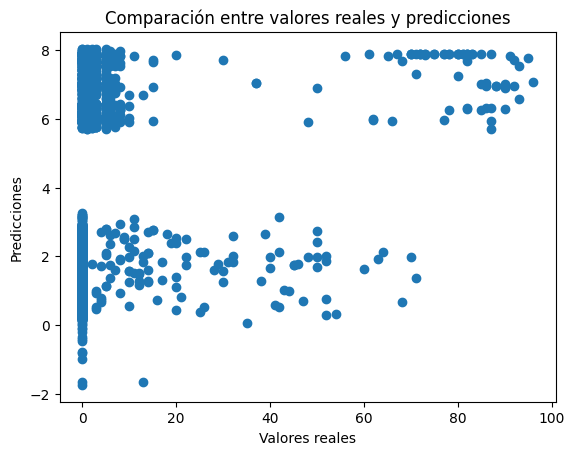

In [58]:
#generame una figura de estos resultados
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Comparación entre valores reales y predicciones')
plt.show()

In [59]:
#calcular metricas de evaluacion
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 169.56508721052123
R-squared: 0.032958560467350684


In [60]:
# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}")
print(f"Coeficiente de Determinación R²: {r2:.2f}")

Error Cuadrático Medio (MSE): 169.57
Raíz del Error Cuadrático Medio (RMSE): 13.02
Coeficiente de Determinación R²: 0.03


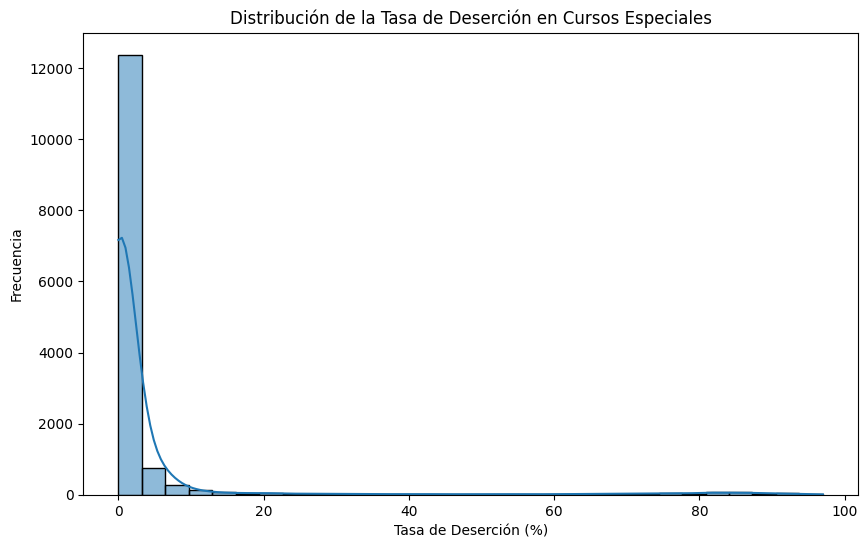

In [56]:
# Visualización de la distribución de la tasa de deserción
plt.figure(figsize=(10, 6))
sns.histplot(df_cursos_especiales['TASA_DESERCION'], bins=30, kde=True)
plt.title('Distribución de la Tasa de Deserción en Cursos Especiales')
plt.xlabel('Tasa de Deserción (%)')
plt.ylabel('Frecuencia')
plt.show()

In [63]:
#Hacer predicciones con nuevos datos (ejemplo)
# Crear un nuevo dato de ejemplo
nuevo_dato = pd.DataFrame({
    'NOMBRE_REGIONAL': [4],  # Ejemplo: Regional Bolivar codificada como 4
    'NOMBRE_CENTRO': [24],   # Ejemplo: Centro de Comercio y Servicios codificado como 24
    'MODALIDAD_FORMACION': ['VIRTUAL'],  # Modalidad virtual
    'TOTAL_APRENDICES_MATRICULADOS': [50],
    'PERIODO': [202402]
})
print(nuevo_dato)
print(df_cursos_especiales.head())

   NOMBRE_REGIONAL  NOMBRE_CENTRO MODALIDAD_FORMACION  \
0                4             24             VIRTUAL   

   TOTAL_APRENDICES_MATRICULADOS  PERIODO  
0                             50   202402  
    CODIGO_REGIONAL  NOMBRE_REGIONAL  CODIGO_CENTRO  NOMBRE_CENTRO  \
7                13                4           9304             24   
8                11               14           9405             70   
10                8                3           9302             24   
17               13                4           9218             99   
18               11               14           9405             70   

    IDENTIFICADOR_UNICO_FICHA FECHA_INICIO_FICHA FECHA_TERMINACION_FICHA  \
7                    12909270         2024-02-08              2024-03-06   
8                    12914465         2024-02-19              2024-02-27   
10                   12918237         2024-02-06              2024-02-27   
17                   12910192         2024-02-09              2024-03-13

In [64]:
# Hacer la predicción
prediccion = model.predict(nuevo_dato)
print(f"\nPredicción de tasa de deserción para el nuevo dato: {prediccion[0]:.2f}%")


Predicción de tasa de deserción para el nuevo dato: 9.01%


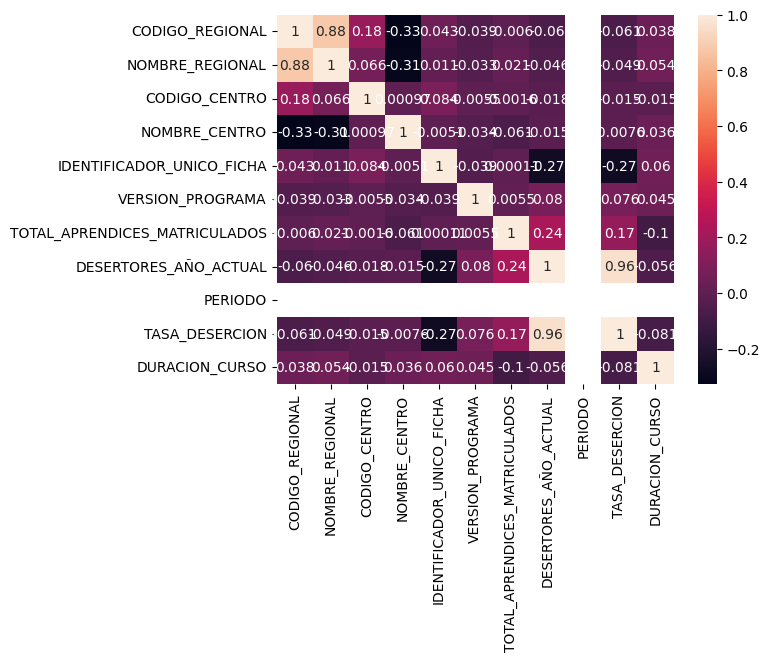

In [67]:
#graficame esto
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Import numpy


# Convert 'DURACION_CURSO' to numeric, handling errors
df_cursos_especiales['DURACION_CURSO'] = pd.to_numeric(df_cursos_especiales['DURACION_CURSO'], errors='coerce')

# Select only numeric columns for correlation calculation
numeric_df = df_cursos_especiales.select_dtypes(include=np.number)

fig, ax = plt.subplots()
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

In [33]:
# 5. Selección de características (features)
# Columnas que podrían ser relevantes para la predicción
features = [
    'CODIGO_REGIONAL',
    'NOMBRE_REGIONAL',
    'CODIGO_CENTRO',
    'NOMBRE_CENTRO',
    'MODALIDAD_FORMACION',
    'TOTAL_APRENDICES_MATRICULADOS',
    'PERIODO'
]


target = 'TASA_DESERCION'